In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets, linear_model

In [2]:
iris = datasets.load_iris()
features = iris.data
feature_labels = iris.feature_names
targets = iris.target
target_labels = iris.target_names

In [3]:
n_samples = features.shape[0]
n_features = features.shape[1]

print(f"Dataset has {n_samples} samples across {n_features} features")
print(f"> The feature labels are:\n> {feature_labels}")


Dataset has 150 samples across 4 features
> The feature labels are:
> ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Loading DataFrames

In [4]:
df = pd.DataFrame(features, columns=feature_labels)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Plotting Features

<AxesSubplot:xlabel='Samples', ylabel='Feature Value (cm)'>

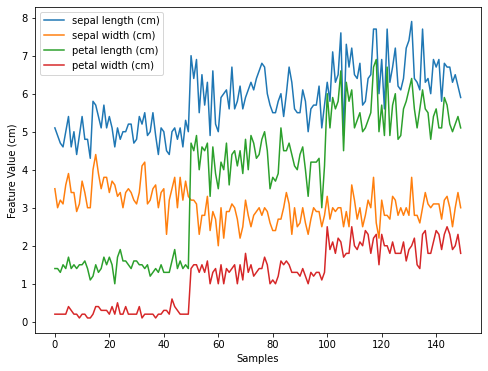

In [5]:
df.plot(figsize=(8, 6), xlabel='Samples', ylabel='Feature Value (cm)')    

#### Getting basic feature statistics

In [6]:
print(f"Showing Feature statistics:")

print(f"> Mean:  \n{df.mean(axis=0)}\n")
print(f"> Max: \n{df.max(axis=0)}\n")
print(f"> Min: \n{df.min(axis=0)}\n")
print(f"> Median: \n{df.median(axis=0)}\n")

Showing Feature statistics:
> Mean:  
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

> Max: 
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

> Min: 
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

> Median: 
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64



### Checking correlation

In [7]:
df.corr().style.background_gradient(cmap='Blues')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


#### Visualising Feature pairs

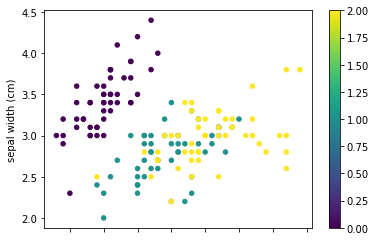

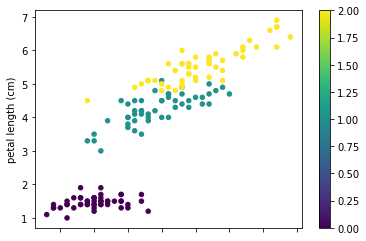

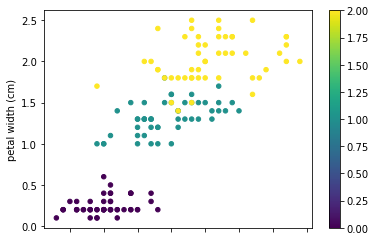

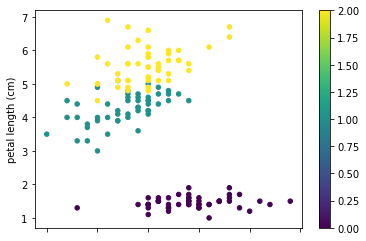

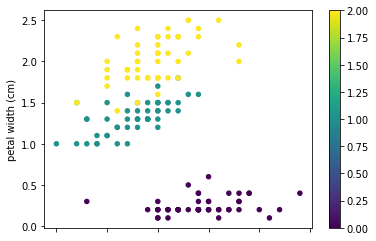

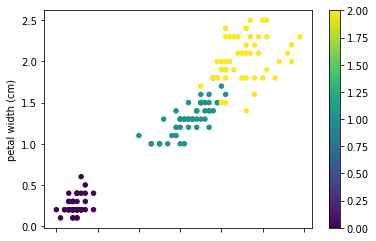

In [8]:
pairs = list(itertools.combinations(range(n_features), 2))

for i,j in pairs:
        df.plot(kind='scatter',
                x=feature_labels[i],
                y=feature_labels[j],
                c = targets,
                colormap='viridis',
                subplots=True)

#### Feature scatterplot matrix

In [9]:
# Calculate the number of unique feature pairs to plot
n_pairs = (n_features * (n_features-1)) / 2

# Set number of subplot rows 
n_rows = 2

# Set number of subplot columns 
n_columns = int(n_pairs / n_rows)

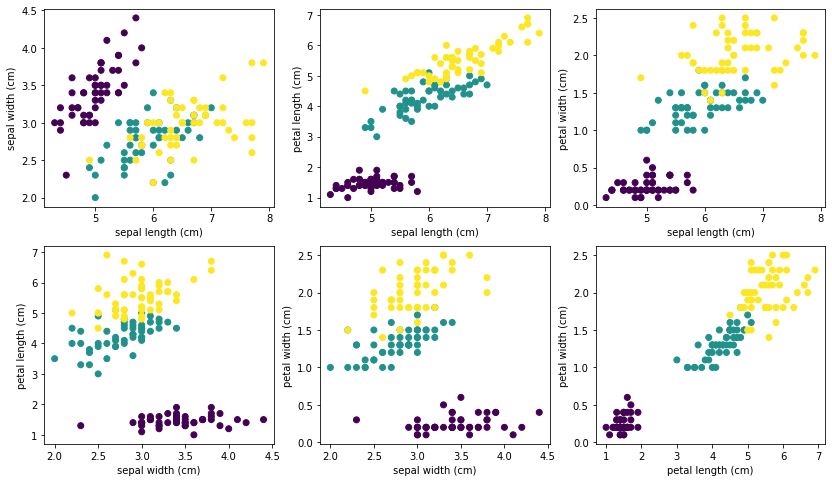

In [10]:
# Generate figure to contain plots and axes to represent a list of individual subplots 
fig, axes = plt.subplots(n_rows, n_columns, figsize = (14,8))
axes = axes.flatten()

 # Get a list of tuples for unique pairs of all features
pairs = list(itertools.combinations(range(n_features), 2))

# Count each unique feature pair and grab their indices  
for index, (i,j) in enumerate(pairs): 

    # Set scatter plot data for the current feature pair
    x_data = features[:,i]
    y_data = features[:,j]
    x_label = feature_labels[i]
    y_label = feature_labels[j]
    
    # Draw a subplot for each pair
    ax = axes[index]
    ax.scatter(x_data, y_data, c = targets, cmap='viridis')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

#### Training a Linear Model for Regression

In [11]:
#  Create a function to prepare data and train based on feature names
def train(x, y):
    # Reshape the data into a single column
    x_train = x.reshape(-1, 1)
    y_train = y.reshape(-1, 1)
    
    # Build linear model
    model = linear_model.LinearRegression()
    
    # Train using predictor and target data
    model.fit(x_train, y_train)

    # Delete the variables so 
    del x_train
    del y_train
    return model

In [12]:
# Set up feature indices
x_feature_idx = 2       # Change value to choose predictor
y_feature_idx = 3       # Change value to choose target

# Grab training data and label data
x_train = features[:, x_feature_idx]
x_name = feature_labels[x_feature_idx]

y_train = features[:, y_feature_idx]
y_name = feature_labels[y_feature_idx]

# Train model
model = train(x_train, y_train)

# Use single sample to test model prediction
sample_idx = 100
sample = x_train[sample_idx].reshape(-1,1)
y_pred = model.predict(sample).flatten()[0]
y_hat = y_train[sample_idx]

print(f"Using {x_name} to predict {y_name}")
print("-"*20)
print(f"> {x_name} has value {sample.flatten()[0]}")
print(f"> {y_name} shoulde be {y_hat}")
print(f"> model believes it is {y_pred}")

Using petal length (cm) to predict petal width (cm)
--------------------
> petal length (cm) has value 6.0
> petal width (cm) shoulde be 2.5
> model believes it is 2.13145697679544


#### Plotting predictions

In [13]:
def plot_prediction(x, y_pred, y_hat, predictor, target):
    plt.clf()
    plt.scatter(x, y_pred, marker='^', label='Prediction')
    plt.scatter(x, y_hat, marker='x', label='Ground Truth')
    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.legend()
    plt.show()

Using sepal length (cm) to predict sepal width (cm)


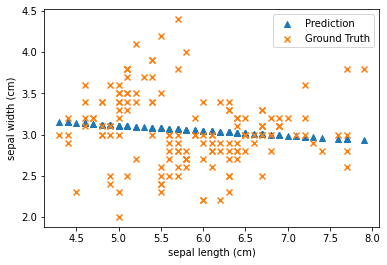

Using sepal length (cm) to predict petal length (cm)


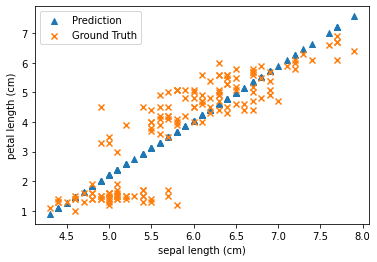

Using sepal length (cm) to predict petal width (cm)


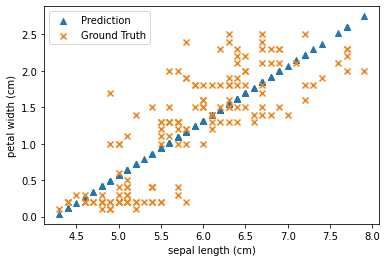

Using sepal width (cm) to predict sepal length (cm)


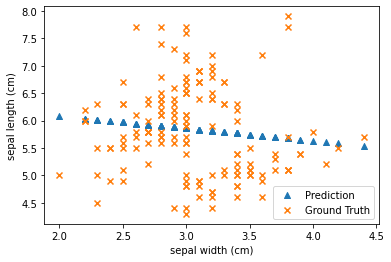

Using sepal width (cm) to predict petal length (cm)


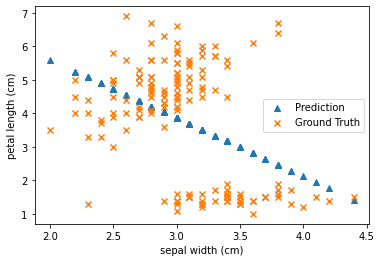

Using sepal width (cm) to predict petal width (cm)


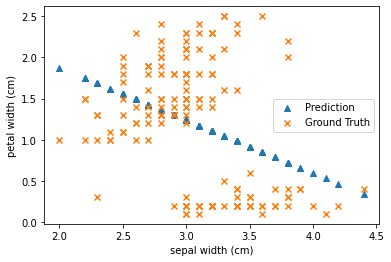

Using petal length (cm) to predict sepal length (cm)


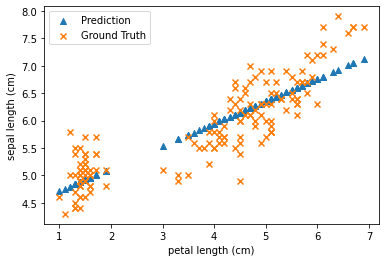

Using petal length (cm) to predict sepal width (cm)


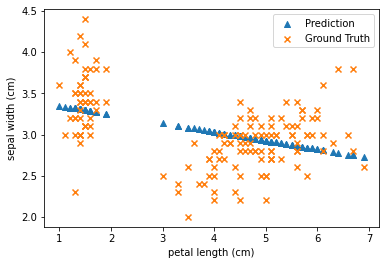

Using petal length (cm) to predict petal width (cm)


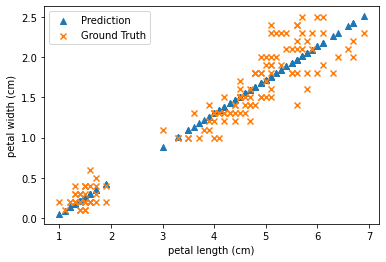

Using petal width (cm) to predict sepal length (cm)


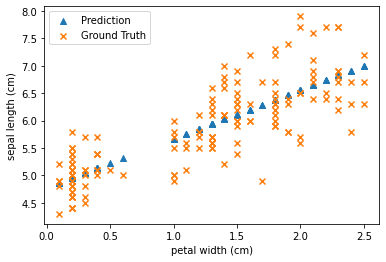

Using petal width (cm) to predict sepal width (cm)


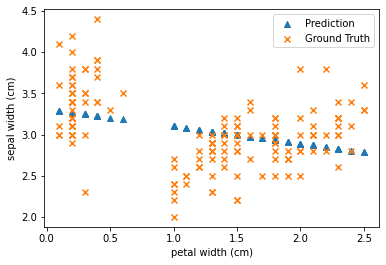

Using petal width (cm) to predict petal length (cm)


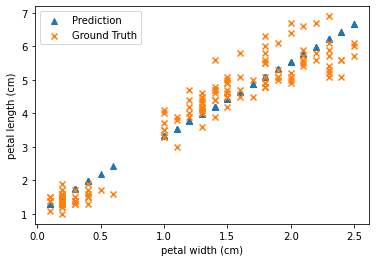

In [14]:
# Create a list of all feature pairs so we can access DataFrame columns
feature_pairs = list(itertools.permutations(feature_labels, 2)) 

# Create a linear model for each pair of features
for predictor, target in feature_pairs:
    print(f"Using {predictor} to predict {target}")

    # Convert iris data from Pandas Series to numpy arrays
    x_data = df[predictor].values
    y_data = df[target].values

    # Get a trained model for this feature pair
    model = train(x_data, y_data)

    # Get predictions from the linear model
    y_pred = model.predict(x_data.reshape(-1, 1))

    # Plot the predictions against the ground truth
    plot_prediction(x_data, y_pred, y_data, predictor, target)
    

#### Predictions as a scatter matrix

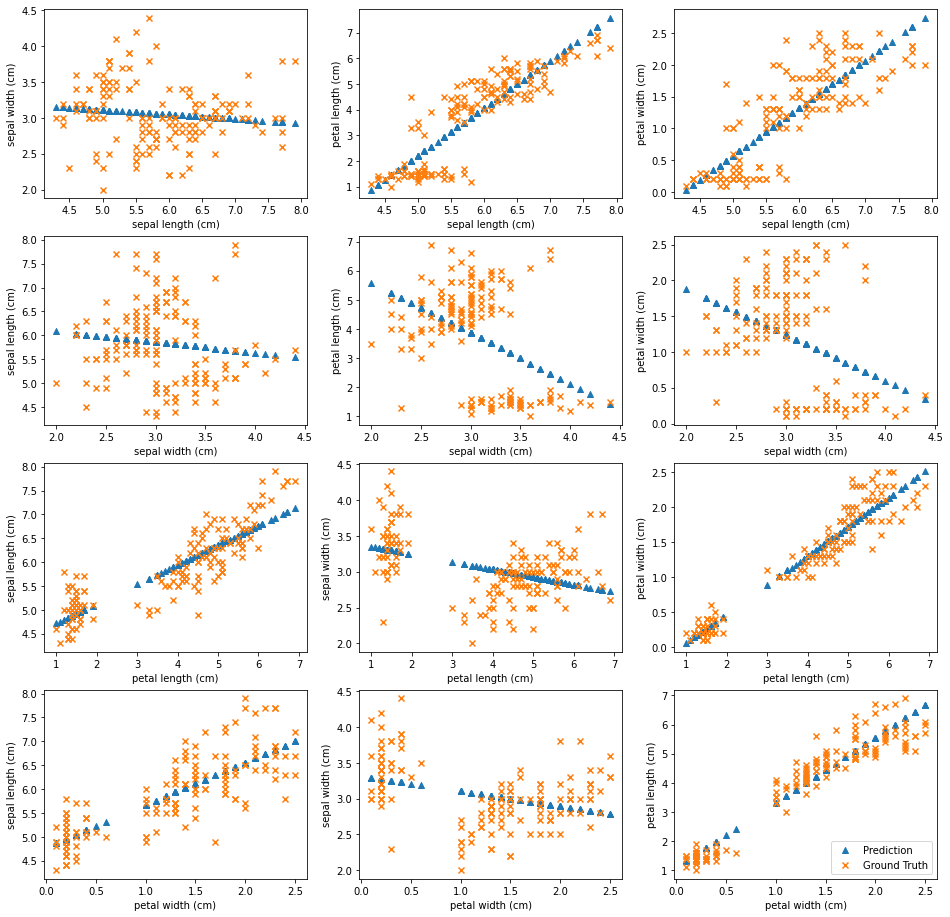

In [15]:
# Create a list of feature pairs so we can access DataFrame columns
label_pairs = list(itertools.permutations(feature_labels, 2)) 
# Calculate the number of unique feature pairs to plot
n_pairs = len(label_pairs)
# Set number of subplot rows 
n_rows = 4
# Set number of subplot columns 
n_columns = int(n_pairs / n_rows)

# Generate figure to contain plots and axes to represent a list of individual subplots 
fig, axes = plt.subplots(n_rows, n_columns, figsize = (16,16))
axes = axes.flatten()

# Count each unique feature pair and grab their indices  
for index, (predictor, target) in enumerate(label_pairs): 
    
    # Convert iris data from Pandas Series to numpy arrays
    x_data = df[predictor].values
    y_data = df[target].values

    # Get a trained model for this feature pair
    model = train(x_data, y_data)
    
    # Get predictions from the linear model
    y_pred = model.predict(x_data.reshape(-1, 1))
    
    # Draw a subplot for each pair
    ax = axes[index]
    ax.scatter(x_data, y_pred, marker='^', label='Prediction')
    ax.scatter(x_data, y_data, marker='x', label='Ground Truth')
    ax.set_xlabel(predictor)
    ax.set_ylabel(target)
ax.legend(loc='lower right')